In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report

In [ ]:
!cp -r /content/drive/MyDrive/ML /content

# Initialize

In [ ]:
data = pd.read_csv('/content/ML/SSL Renegotiation_dataset-002.csv', header=None)
print('Data Shape:', data.shape)
data.head()

Data Shape: (2207571, 115)


,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,1.000000,1452.0,0.000000e+00,1.000000,1452.0,0.000000e+00,1.000000,1452.0,0.000000e+00,1.000000,...,0.0,0.0,0.0,1.000000,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0
1,1.999512,1452.0,0.000000e+00,1.999707,1452.0,4.656613e-10,1.999902,1452.0,0.000000e+00,1.999990,...,0.0,0.0,0.0,1.999999,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0
2,2.998694,1452.0,4.656613e-10,2.999216,1452.0,4.656613e-10,2.999739,1452.0,4.656613e-10,2.999974,...,0.0,0.0,0.0,2.999997,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0
3,3.997510,1452.0,4.656613e-10,3.998506,1452.0,0.000000e+00,3.999502,1452.0,0.000000e+00,3.999950,...,0.0,0.0,0.0,3.999995,1452.0,0.000000,1452.0,0.000000e+00,0.0,0.0
4,4.995598,1452.0,0.000000e+00,4.997358,1452.0,0.000000e+00,4.999119,1452.0,0.000000e+00,4.999912,...,0.0,0.0,0.0,4.999991,1452.0,0.000022,1452.0,4.656613e-10,0.0,0.0


In [ ]:
sc = MinMaxScaler()
scaled_arr = sc.fit_transform(data)

scaled_data = pd.DataFrame(scaled_arr, columns=data.columns, index=data.index)
del data
del scaled_arr
scaled_data.head()

,0,1,2,3,4,5,6,7,8,9,...,105,106,107,108,109,110,111,112,113,114
0,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,...,0.0,0.317334,0.517389,0.000000,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491
1,0.002977,1.0,0.000000e+00,0.002102,1.0,9.619645e-16,0.000857,1.0,0.000000e+00,0.000095,...,0.0,0.317334,0.517389,0.000022,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491
2,0.005953,1.0,9.627114e-16,0.004203,1.0,9.619645e-16,0.001714,1.0,9.693312e-16,0.000191,...,0.0,0.317334,0.517389,0.000045,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491
3,0.008927,1.0,9.627114e-16,0.006304,1.0,0.000000e+00,0.002571,1.0,0.000000e+00,0.000286,...,0.0,0.317334,0.517389,0.000067,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491
4,0.011900,1.0,0.000000e+00,0.008404,1.0,0.000000e+00,0.003428,1.0,0.000000e+00,0.000382,...,0.0,0.317334,0.517389,0.000089,1.0,3.107141e-08,1.0,9.648800e-16,0.308324,0.516491


# All Features

## Create CSV

In [ ]:
label = pd.read_csv('/content/ML/SSL Renegotiation_labels.csv')
label = label.drop('Unnamed: 0', axis=1)
print('Num Labels:', len(label))
label.head()

Num Labels: 2207571


,x
0,0
1,0
2,0
3,0
4,0


In [ ]:
data = pd.concat([scaled_data, label], axis=1)
del scaled_data
del label
data.head()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,x
0,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,...,0.317334,0.517389,0.000000,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
1,0.002977,1.0,0.000000e+00,0.002102,1.0,9.619645e-16,0.000857,1.0,0.000000e+00,0.000095,...,0.317334,0.517389,0.000022,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
2,0.005953,1.0,9.627114e-16,0.004203,1.0,9.619645e-16,0.001714,1.0,9.693312e-16,0.000191,...,0.317334,0.517389,0.000045,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
3,0.008927,1.0,9.627114e-16,0.006304,1.0,0.000000e+00,0.002571,1.0,0.000000e+00,0.000286,...,0.317334,0.517389,0.000067,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
4,0.011900,1.0,0.000000e+00,0.008404,1.0,0.000000e+00,0.003428,1.0,0.000000e+00,0.000382,...,0.317334,0.517389,0.000089,1.0,3.107141e-08,1.0,9.648800e-16,0.308324,0.516491,0


In [ ]:
data.to_csv('preprocessed.csv', index=False)

## Create Input

In [ ]:
data = pd.read_csv('preprocessed.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,106,107,108,109,110,111,112,113,114,x
0,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,...,0.317334,0.517389,0.000000,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
1,0.002977,1.0,0.000000e+00,0.002102,1.0,9.619645e-16,0.000857,1.0,0.000000e+00,0.000095,...,0.317334,0.517389,0.000022,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
2,0.005953,1.0,9.627114e-16,0.004203,1.0,9.619645e-16,0.001714,1.0,9.693312e-16,0.000191,...,0.317334,0.517389,0.000045,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
3,0.008927,1.0,9.627114e-16,0.006304,1.0,0.000000e+00,0.002571,1.0,0.000000e+00,0.000286,...,0.317334,0.517389,0.000067,1.0,0.000000e+00,1.0,0.000000e+00,0.308324,0.516491,0
4,0.011900,1.0,0.000000e+00,0.008404,1.0,0.000000e+00,0.003428,1.0,0.000000e+00,0.000382,...,0.317334,0.517389,0.000089,1.0,3.107141e-08,1.0,9.648800e-16,0.308324,0.516491,0


In [ ]:
data['x'].value_counts()

0    2114919
1      92652
Name: x, dtype: int64

In [ ]:
x_train = data.iloc[:, :-1].to_numpy()
y_train = data.iloc[:, -1].to_numpy()
del data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(1594969, 115)
(281466, 115)
(331136, 115)


## Cross Validation

In [ ]:
# Cross Validation for finding best contamination
conts = [0.001, 0.005, 0.008, 0.01, 0.02, 0.5, 0.1]

for cont in conts:
    model = IsolationForest(contamination=cont)
    model.fit(x_train)
    y_pred = model.predict(x_valid)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    valid_precision = precision_score(y_valid, y_pred)
    print(f'{cont}:{valid_precision}')

0.001:0.658703071672355
0.005:0.5389386629910407
0.008:0.5417568152315015
0.01:0.5359229975936748
0.02:0.4432754690513765
0.5:0.0833956166762761
0.1:0.29511117445838086


In [ ]:
x_train = np.concatenate([x_train, x_valid], axis=0)
y_train = np.concatenate([y_train, y_valid], axis=0)

## Fit and Test

In [ ]:
model = IsolationForest(contamination=0.001)
model.fit(x_train)

IsolationForest(contamination=0.001)

In [ ]:
test_scores = model.decision_function(x_test)
test_scores

array([0.3201683 , 0.19945841, 0.15093609, ..., 0.32381677, 0.27785085,
       0.26178072])

In [ ]:
y_pred_test = model.predict(x_test)
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    317263
           1       0.58      0.01      0.03     13873

    accuracy                           0.96    331136
   macro avg       0.77      0.51      0.50    331136
weighted avg       0.94      0.96      0.94    331136



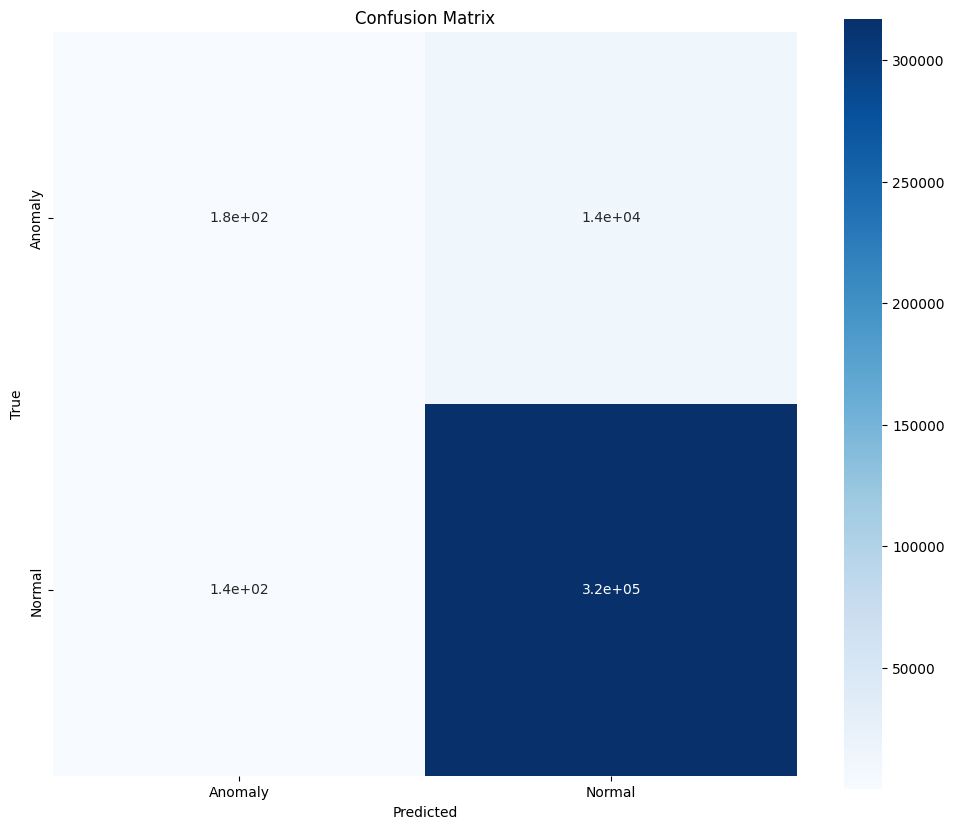

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, normalize=None)
cm = np.roll(cm, 1, (0, 1))
cm_df = pd.DataFrame(cm, index=['Anomaly', 'Normal'], columns=['Anomaly', 'Normal'])
plt.figure(figsize =(12, 10))
plt.title('Confusion Matrix')
ax = sns.heatmap(cm_df, annot=True, cmap='Blues', square=True)
ax.set(xlabel='Predicted', ylabel='True')
plt.show()

# Feature Selection

## Create CSV with Feature Selection

In [ ]:
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(scaled_data)
X_selected.shape

(2207571, 80)

In [ ]:
selected_indices = selector.get_support(indices=True)
selected_features = scaled_data.iloc[:, selected_indices]
del scaled_data
print(selected_features.shape)
selected_features.head()

(2207571, 80)


,0,1,2,3,4,5,6,7,8,9,...,96,97,101,102,103,104,108,109,110,111
0,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,...,0.000000e+00,0.999753,0.000000,1.0,0.0,1.0,0.000000,1.0,0.000000e+00,1.0
1,0.002977,1.0,0.000000e+00,0.002102,1.0,9.619645e-16,0.000857,1.0,0.000000e+00,0.000095,...,0.000000e+00,0.999753,0.000209,1.0,0.0,1.0,0.000022,1.0,0.000000e+00,1.0
2,0.005953,1.0,9.627114e-16,0.004203,1.0,9.619645e-16,0.001714,1.0,9.693312e-16,0.000191,...,3.130932e-08,0.999753,0.000419,1.0,0.0,1.0,0.000045,1.0,0.000000e+00,1.0
3,0.008927,1.0,9.627114e-16,0.006304,1.0,0.000000e+00,0.002571,1.0,0.000000e+00,0.000286,...,0.000000e+00,0.999753,0.000628,1.0,0.0,1.0,0.000067,1.0,0.000000e+00,1.0
4,0.011900,1.0,0.000000e+00,0.008404,1.0,0.000000e+00,0.003428,1.0,0.000000e+00,0.000382,...,0.000000e+00,0.999753,0.000837,1.0,0.0,1.0,0.000089,1.0,3.107141e-08,1.0


In [ ]:
label = pd.read_csv('/content/ML/SSL Renegotiation_labels.csv')
label = label.drop('Unnamed: 0', axis=1)
print('Num Labels:', len(label))
label.head()

Num Labels: 2207571


,x
0,0
1,0
2,0
3,0
4,0


In [ ]:
data = pd.concat([selected_features, label], axis=1)
del selected_features
del label
data.head()

,0,1,2,3,4,5,6,7,8,9,...,97,101,102,103,104,108,109,110,111,x
0,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,...,0.999753,0.000000,1.0,0.0,1.0,0.000000,1.0,0.000000e+00,1.0,0
1,0.002977,1.0,0.000000e+00,0.002102,1.0,9.619645e-16,0.000857,1.0,0.000000e+00,0.000095,...,0.999753,0.000209,1.0,0.0,1.0,0.000022,1.0,0.000000e+00,1.0,0
2,0.005953,1.0,9.627114e-16,0.004203,1.0,9.619645e-16,0.001714,1.0,9.693312e-16,0.000191,...,0.999753,0.000419,1.0,0.0,1.0,0.000045,1.0,0.000000e+00,1.0,0
3,0.008927,1.0,9.627114e-16,0.006304,1.0,0.000000e+00,0.002571,1.0,0.000000e+00,0.000286,...,0.999753,0.000628,1.0,0.0,1.0,0.000067,1.0,0.000000e+00,1.0,0
4,0.011900,1.0,0.000000e+00,0.008404,1.0,0.000000e+00,0.003428,1.0,0.000000e+00,0.000382,...,0.999753,0.000837,1.0,0.0,1.0,0.000089,1.0,3.107141e-08,1.0,0


In [ ]:
data.to_csv('preprocessed.csv', index=False)

## Create Input

In [ ]:
data = pd.read_csv('preprocessed.csv')
data.head()

,0,1,2,3,4,5,6,7,8,9,...,97,101,102,103,104,108,109,110,111,x
0,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,1.0,0.000000e+00,0.000000,...,0.999753,0.000000,1.0,0.0,1.0,0.000000,1.0,0.000000e+00,1.0,0
1,0.002977,1.0,0.000000e+00,0.002102,1.0,9.619645e-16,0.000857,1.0,0.000000e+00,0.000095,...,0.999753,0.000209,1.0,0.0,1.0,0.000022,1.0,0.000000e+00,1.0,0
2,0.005953,1.0,9.627114e-16,0.004203,1.0,9.619645e-16,0.001714,1.0,9.693312e-16,0.000191,...,0.999753,0.000419,1.0,0.0,1.0,0.000045,1.0,0.000000e+00,1.0,0
3,0.008927,1.0,9.627114e-16,0.006304,1.0,0.000000e+00,0.002571,1.0,0.000000e+00,0.000286,...,0.999753,0.000628,1.0,0.0,1.0,0.000067,1.0,0.000000e+00,1.0,0
4,0.011900,1.0,0.000000e+00,0.008404,1.0,0.000000e+00,0.003428,1.0,0.000000e+00,0.000382,...,0.999753,0.000837,1.0,0.0,1.0,0.000089,1.0,3.107141e-08,1.0,0


In [ ]:
data['x'].value_counts()

0    2114919
1      92652
Name: x, dtype: int64

In [ ]:
x_train = data.iloc[:, :-1].to_numpy()
y_train = data.iloc[:, -1].to_numpy()
del data

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
x_train, x_valid, y_train, y_valid = train_test_split(x_train, y_train, test_size=0.15, random_state=42)
print(x_train.shape)
print(x_valid.shape)
print(x_test.shape)

(1594969, 80)
(281466, 80)
(331136, 80)


In [ ]:
print((y_train == 1).sum())
print((y_valid == 1).sum())
print((y_test == 1).sum())

67063
11716
13873


## Cross Validation

In [ ]:
# Cross Validation for finding best contamination
conts = [0.001, 0.005, 0.008, 0.01, 0.02, 0.5, 0.1]

for cont in conts:
    model = IsolationForest(contamination=cont)
    model.fit(x_train)
    y_pred = model.predict(x_valid)
    y_pred[y_pred == 1] = 0
    y_pred[y_pred == -1] = 1
    valid_precision = precision_score(y_valid, y_pred)
    print(f'{cont}:{valid_precision}')

0.001:0.3914590747330961
0.005:0.5503122831367107
0.008:0.5388265746333045
0.01:0.40930869267624914
0.02:0.42107117688513035
0.5:0.08329778460313397
0.1:0.24564397980229002


In [ ]:
x_train = np.concatenate([x_train, x_valid], axis=0)
y_train = np.concatenate([y_train, y_valid], axis=0)

## Fit and Test

In [ ]:
model = IsolationForest(contamination=0.005)
model.fit(x_train)

IsolationForest(contamination=0.005)

In [ ]:
test_scores = model.decision_function(x_test)
y_pred_test = model.predict(x_test)
y_pred_test[y_pred_test == 1] = 0
y_pred_test[y_pred_test == -1] = 1

In [ ]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    317263
           1       0.56      0.07      0.12     13873

    accuracy                           0.96    331136
   macro avg       0.76      0.53      0.55    331136
weighted avg       0.94      0.96      0.94    331136



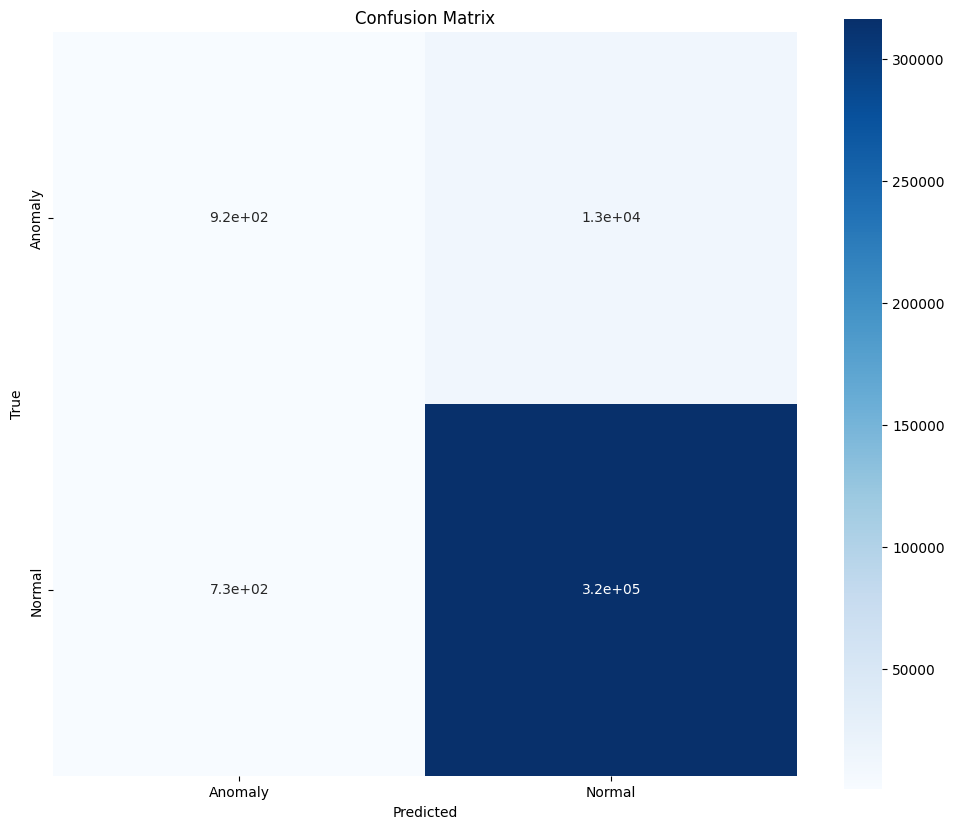

In [ ]:
cm = confusion_matrix(y_test, y_pred_test, normalize=None)
cm = np.roll(cm, 1, (0, 1))
cm_df = pd.DataFrame(cm, index=['Anomaly', 'Normal'], columns=['Anomaly', 'Normal'])
plt.figure(figsize =(12, 10))
plt.title('Confusion Matrix')
ax = sns.heatmap(cm_df, annot=True, cmap='Blues', square=True)
ax.set(xlabel='Predicted', ylabel='True')
plt.show()